<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Credit-Card-Loan-Status" data-toc-modified-id="Credit-Card-Loan-Status-0">Credit Card Loan Status</a></span></li><li><span><a href="#Required-Library" data-toc-modified-id="Required-Library-1">Required Library</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2">Import Data</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3">Data Wrangling</a></span></li><li><span><a href="#Is-Dataset-a-imbalance?" data-toc-modified-id="Is-Dataset-a-imbalance?-4">Is Dataset a imbalance?</a></span></li><li><span><a href="#Explorartory-Data-Analysis" data-toc-modified-id="Explorartory-Data-Analysis-5">Explorartory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-5.1">Correlation</a></span></li><li><span><a href="#Effect-of-Sex,-Education-and-Marriage-on-Credit-card-Loan-Status" data-toc-modified-id="Effect-of-Sex,-Education-and-Marriage-on-Credit-card-Loan-Status-5.2">Effect of Sex, Education and Marriage on Credit card Loan Status</a></span></li><li><span><a href="#Effect-of-Age-on-Credit-card-Loan-Status" data-toc-modified-id="Effect-of-Age-on-Credit-card-Loan-Status-5.3">Effect of Age on Credit card Loan Status</a></span></li><li><span><a href="#Effect-of-Limit-of-on-Credit-card-loan" data-toc-modified-id="Effect-of-Limit-of-on-Credit-card-loan-5.4">Effect of Limit of on Credit card loan</a></span></li><li><span><a href="#Effect-of-Repayment-Bill-on-Credit-card-Loan-Status" data-toc-modified-id="Effect-of-Repayment-Bill-on-Credit-card-Loan-Status-5.5">Effect of Repayment Bill on Credit card Loan Status</a></span></li><li><span><a href="#Effect-of-Bill-Amount-on-Credit-card-Loan-Status" data-toc-modified-id="Effect-of-Bill-Amount-on-Credit-card-Loan-Status-5.6">Effect of Bill Amount on Credit card Loan Status</a></span></li><li><span><a href="#Distribution-of-Payment-Amount" data-toc-modified-id="Distribution-of-Payment-Amount-5.7">Distribution of Payment Amount</a></span></li></ul></li><li><span><a href="#Spliting-Dataset" data-toc-modified-id="Spliting-Dataset-6">Spliting Dataset</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7">Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.1">Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes-model" data-toc-modified-id="Naive-Bayes-model-7.2">Naive Bayes model</a></span></li><li><span><a href="#Decision-Tree-model" data-toc-modified-id="Decision-Tree-model-7.3">Decision Tree model</a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-7.4">Random Forest Model</a></span></li><li><span><a href="#K-Neighbour-Model" data-toc-modified-id="K-Neighbour-Model-7.5">K-Neighbour Model</a></span></li><li><span><a href="#XGBboost-Model" data-toc-modified-id="XGBboost-Model-7.6">XGBboost Model</a></span></li></ul></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-8">Model Interpretation</a></span></li><li><span><a href="#Validation-Model" data-toc-modified-id="Validation-Model-9">Validation Model</a></span></li></ul></div>

# Credit Card Loan Status

# Required Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams["figure.figsize"] = 12,3
plt.rcParams["figure.autolayout"] = True

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier, cv, plot_importance

from prettytable import PrettyTable

from sklearn import metrics

# Import Data

In [13]:
df = pd.read_csv("classification_data.csv", header=[0])

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,17290,170000,2,3,1,40,1,2,0,0,...,19520,5200,0,0,2000,1136,1000,0,36679,1
1,16942,20000,1,3,3,59,2,0,0,0,...,18055,18755,20299,1596,1600,1300,1000,2000,0,1
2,2220,340000,2,1,1,41,-1,2,-1,-1,...,3570,3094,14645,0,24386,3570,0,14645,4534,1
3,13615,70000,2,3,3,39,0,0,-1,0,...,15133,3148,4699,3000,11000,5000,3150,2000,4000,0
4,11197,120000,2,2,2,28,-1,-1,-1,-1,...,390,390,14613,3821,1113,390,390,14613,770,0


In [15]:
df.shape

(30000, 25)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [17]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Wrangling

The missing data is verified in dataset. 

In [18]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

The duplicated data is also verified.

In [19]:
df.duplicated().sum()

0

The Id column is also droped. 

In [20]:
df.drop("ID", axis = 1, inplace = True)

# Is Dataset a imbalance?

The Dataset is imbalanced, it means that the minority class makes a small percentage of the data set.

In [21]:
df["default.payment.next.month"].value_counts()/len(df)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

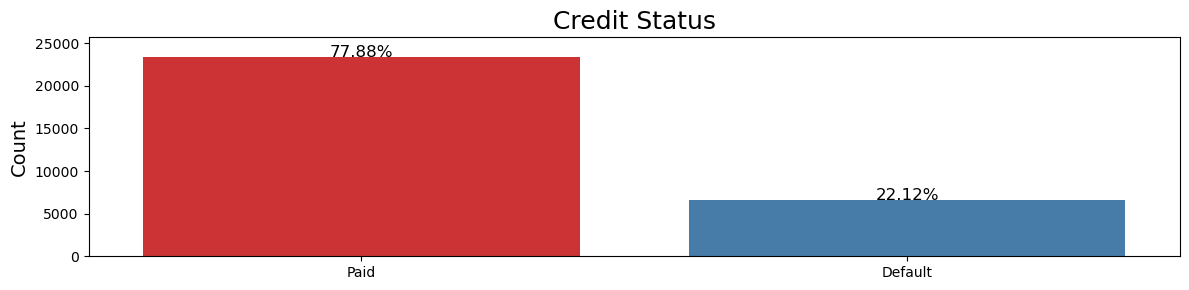

In [22]:
ax = sns.countplot(df["default.payment.next.month"], palette="Set1")
ax.set_ylabel("Count", fontsize = 14)
ax.set_xlabel("")
ax.set_title("Credit Status", fontsize = 18)
ax.set_xticklabels(["Paid","Default"])

sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10);

# Explorartory Data Analysis

## Correlation

The heatmap shows the correlation between all the features in the dataset. Of notable correlations (all positive) are "BILL_AMT" features with one another, then "PAY" features with eachother, respectively. It means that, in general, whether bill payments will be done on time or will have delays are somewhat correlated, but the bill statements are very correlated with eachother. 

In [23]:
pd.DataFrame(df.corr())


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


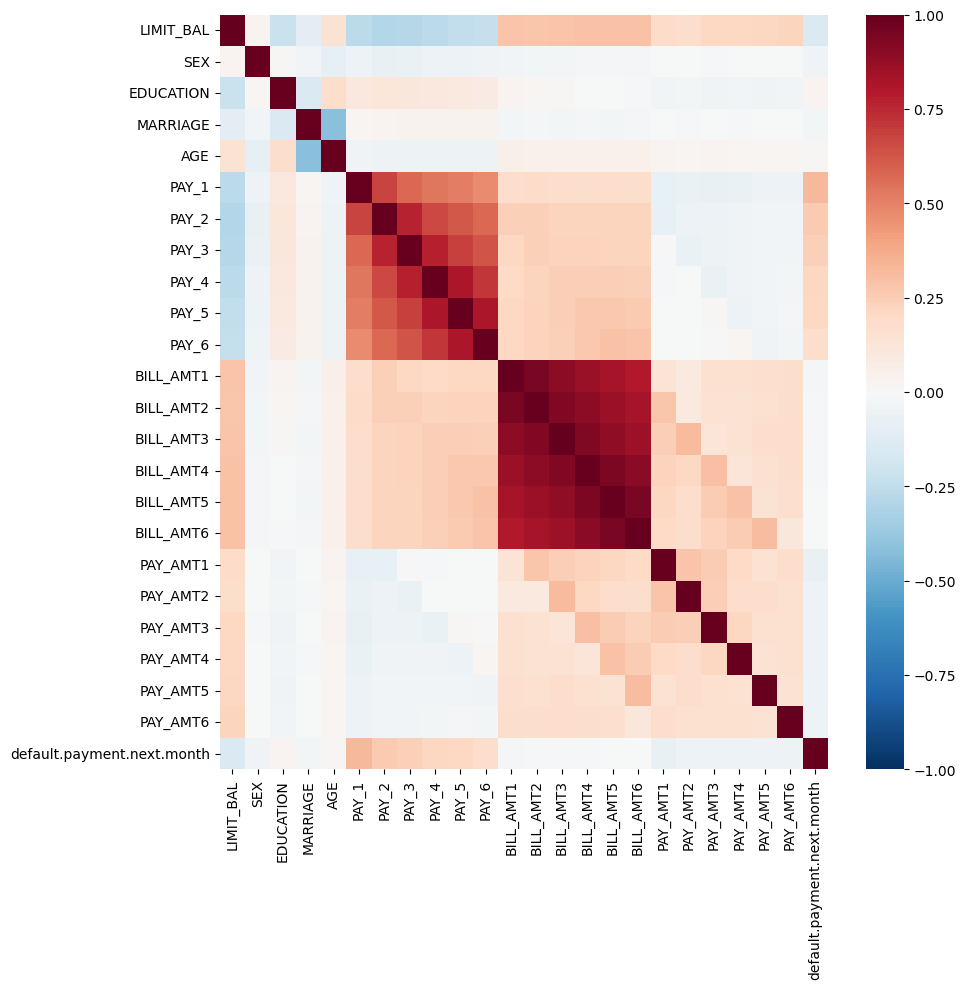

In [24]:
plt.figure(figsize= (10,10))
sns.heatmap(df.corr(), annot=False, cmap = "RdBu_r", vmin=-1, vmax=1);

## Effect of Sex, Education and Marriage on Credit card Loan Status


Sex: 1 = male; 2 = female.

Education: 0 = Other; 1 = graduate school, 2 = university, 3 = high school, 4= College, 5= Trade School, 6=Vacational

Marriage: 1 = married; 2 = single; 3 = divorced; 0=others.

posx and posy should be finite values
posx and posy should be finite values


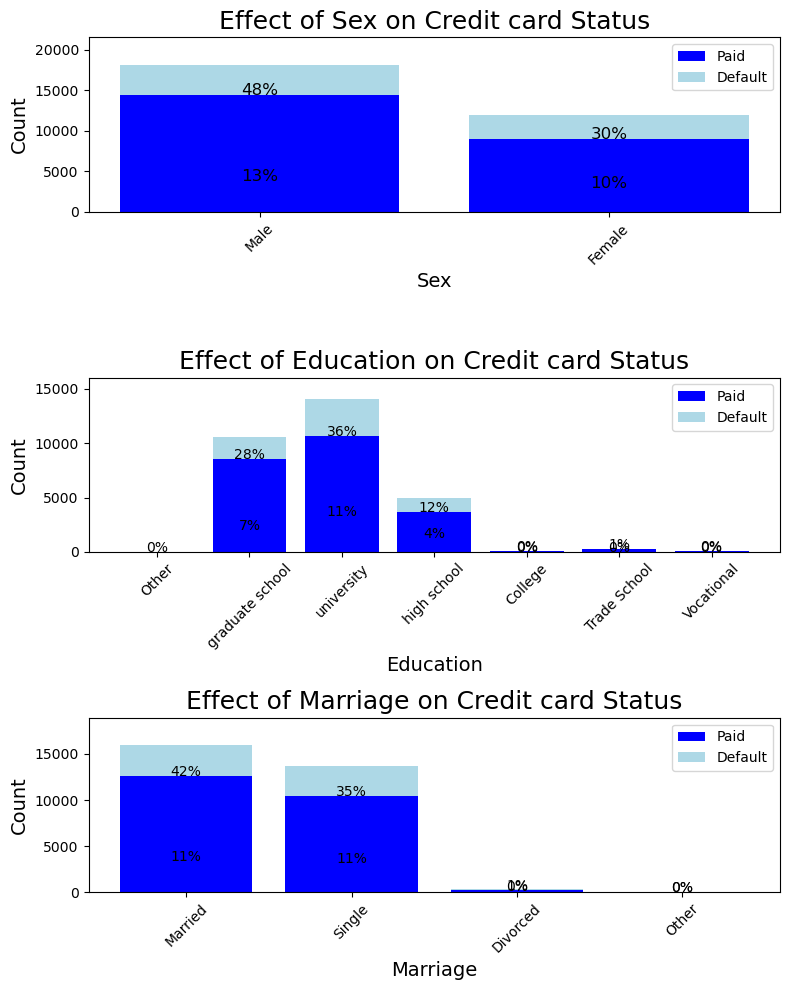

In [25]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows = 3, ncols = 1, figsize=(8,10))


m1= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'SEX'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'SEX'].value_counts()}, index=None)

m2= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'EDUCATION'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'EDUCATION'].value_counts()}, index=None)

m3= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'MARRIAGE'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'MARRIAGE'].value_counts()}, index=None)



m1= m1.set_axis(["Male","Female"], axis = "index")
m2 = m2.set_axis(["Other","graduate school","university","high school","College", "Trade School", "Vocational"], axis = "index")
m3 = m3.set_axis(["Married","Single","Divorced","Other"])


ax1.bar(m1.index,m1["Paid"], color = "blue")
ax1.bar(m1.index, m1["Default"], bottom = m1["Paid"], color = "lightblue" )
ax1.set_xlabel("Sex", fontsize = 14)
ax1.set_ylabel("Count", fontsize = 14)
ax1.set_title("Effect of Sex on Credit card Status", fontsize = 18)
ax1.set_xticklabels(m1.index, rotation=45)
ax1.legend(["Paid","Default"])

sizes1=[]
for p in ax1.patches:
    height = p.get_height()
    sizes1.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.0f}%'.format(height/len(df)*100),
            ha="center", fontsize=12) 
ax1.set_ylim(0, max(sizes1) * 1.50);


ax2.bar(m2.index,m2["Paid"], color = "blue")
ax2.bar(m2.index, m2["Default"], bottom = m2["Paid"], color = "lightblue" )
ax2.set_xlabel("Education", fontsize = 14)
ax2.set_ylabel("Count", fontsize = 14)
ax2.set_title("Effect of Education on Credit card Status", fontsize = 18)
ax2.set_xticklabels(m2.index, rotation=45)
ax2.legend(["Paid","Default"])

sizes2=[]
for p in ax2.patches:
    height = p.get_height()
    sizes2.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.0f}%'.format(height/len(df)*100),
            ha="center", fontsize=10) 
ax2.set_ylim(0, max(sizes2) * 1.50);


ax3.bar(m3.index,m3["Paid"], color = "blue")
ax3.bar(m3.index, m3["Default"], bottom = m3["Paid"], color = "lightblue" )
ax3.set_xlabel("Marriage", fontsize = 14)
ax3.set_ylabel("Count", fontsize = 14)
ax3.set_title("Effect of Marriage on Credit card Status", fontsize = 18)
ax3.set_xticklabels(m3.index, rotation=45)
ax3.legend(["Paid","Default"])

sizes3=[]
for p in ax3.patches:
    height = p.get_height()
    sizes3.append(height)
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.0f}%'.format(height/len(df)*100),
            ha="center", fontsize=10) 
ax3.set_ylim(0, max(sizes3) * 1.50);


The detailed value for each figure are shown below

In [26]:
print("Effect of SEX")

Effect of SEX


In [27]:
m1

,Paid,Default
Male,14349,3763
Female,9015,2873


In [28]:
print("Effect of Education")


Effect of Education


In [29]:
m2

,Paid,Default
Other,14,NaN
graduate school,8549,2036.0
university,10700,3330.0
high school,3680,1237.0
College,116,7.0
Trade School,262,18.0
Vocational,43,8.0


In [30]:
print("Effect of marriage")


Effect of marriage


In [31]:
m3

,Paid,Default
Married,12623,3341
Single,10453,3206
Divorced,239,84
Other,49,5


## Effect of Age on Credit card Loan Status

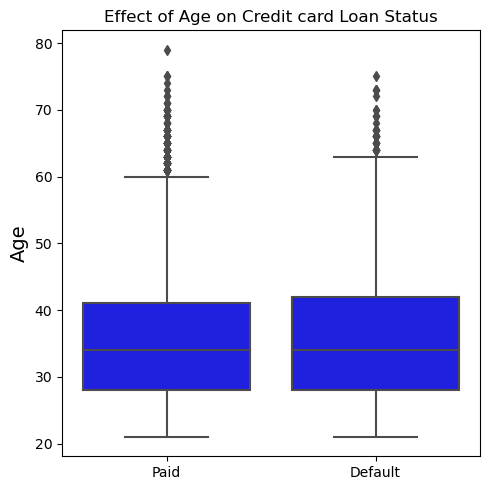

In [32]:
fig = plt.figure(figsize = (5,5))

ax = sns.boxplot(x = df["default.payment.next.month"],y = df["AGE"], color = "blue")
ax.set_xlabel("")
ax.set_ylabel("Age", fontsize = 14)
ax.set_title("Effect of Age on Credit card Loan Status")
ax.set_xticklabels(["Paid","Default"]);


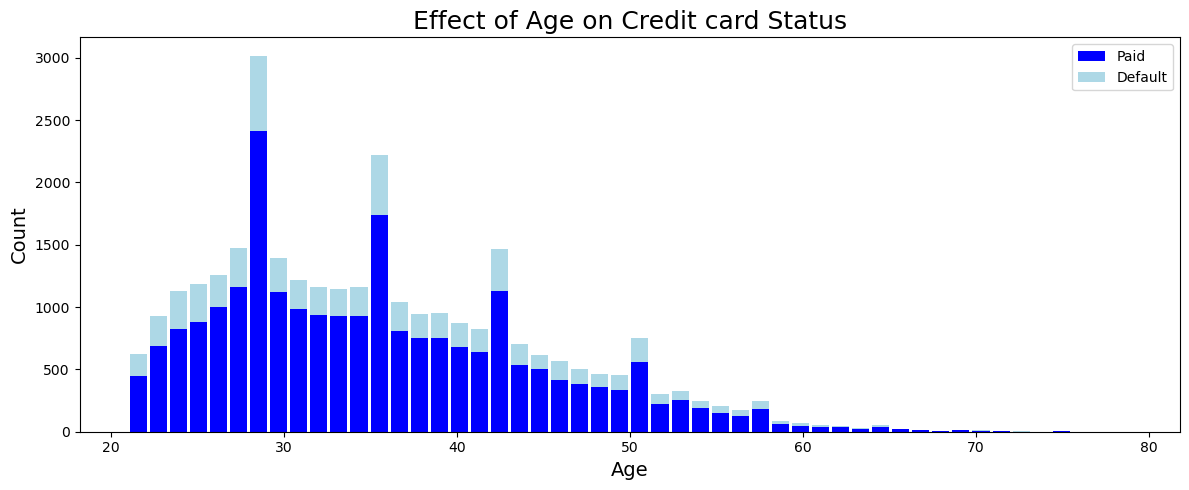

In [33]:
fig, ax = plt.subplots(figsize=(12,5))

m4= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'AGE'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'AGE']}, index=None)


ax.hist(m4,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax.set_xlabel("Age", fontsize = 14)
ax.set_ylabel("Count", fontsize = 14)
ax.set_title("Effect of Age on Credit card Status", fontsize = 18)
ax.legend(["Paid","Default"]);



## Effect of Limit of on Credit card loan 

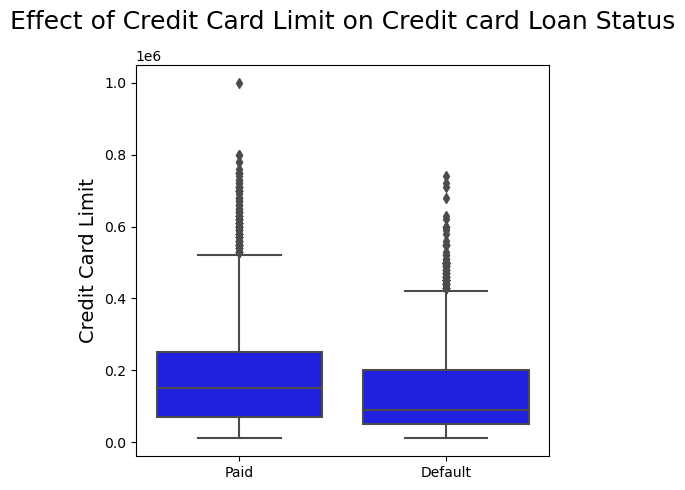

In [34]:
fig = plt.figure(figsize = (5,5))

ax = sns.boxplot(x = df["default.payment.next.month"],y = df["LIMIT_BAL"], color = "blue")
ax.set_xlabel("")
ax.set_ylabel("Credit Card Limit", fontsize = 14)
ax.set_title("Effect of Credit Card Limit on Credit card Loan Status\n", fontsize = 18)
ax.set_xticklabels(["Paid","Default"]);


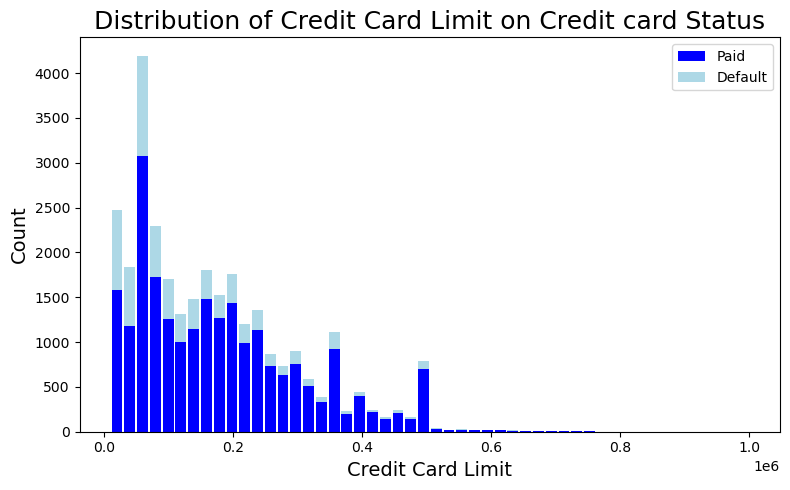

In [35]:
fig, ax = plt.subplots(figsize=(8,5))

m5= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'LIMIT_BAL'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'LIMIT_BAL']}, index=None)


ax.hist(m5,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax.set_xlabel("Credit Card Limit", fontsize = 14)
ax.set_ylabel("Count", fontsize = 14)
ax.set_title("Distribution of Credit Card Limit on Credit card Status", fontsize = 18)
ax.legend(["Paid","Default"]);

## Effect of Repayment Bill on Credit card Loan Status

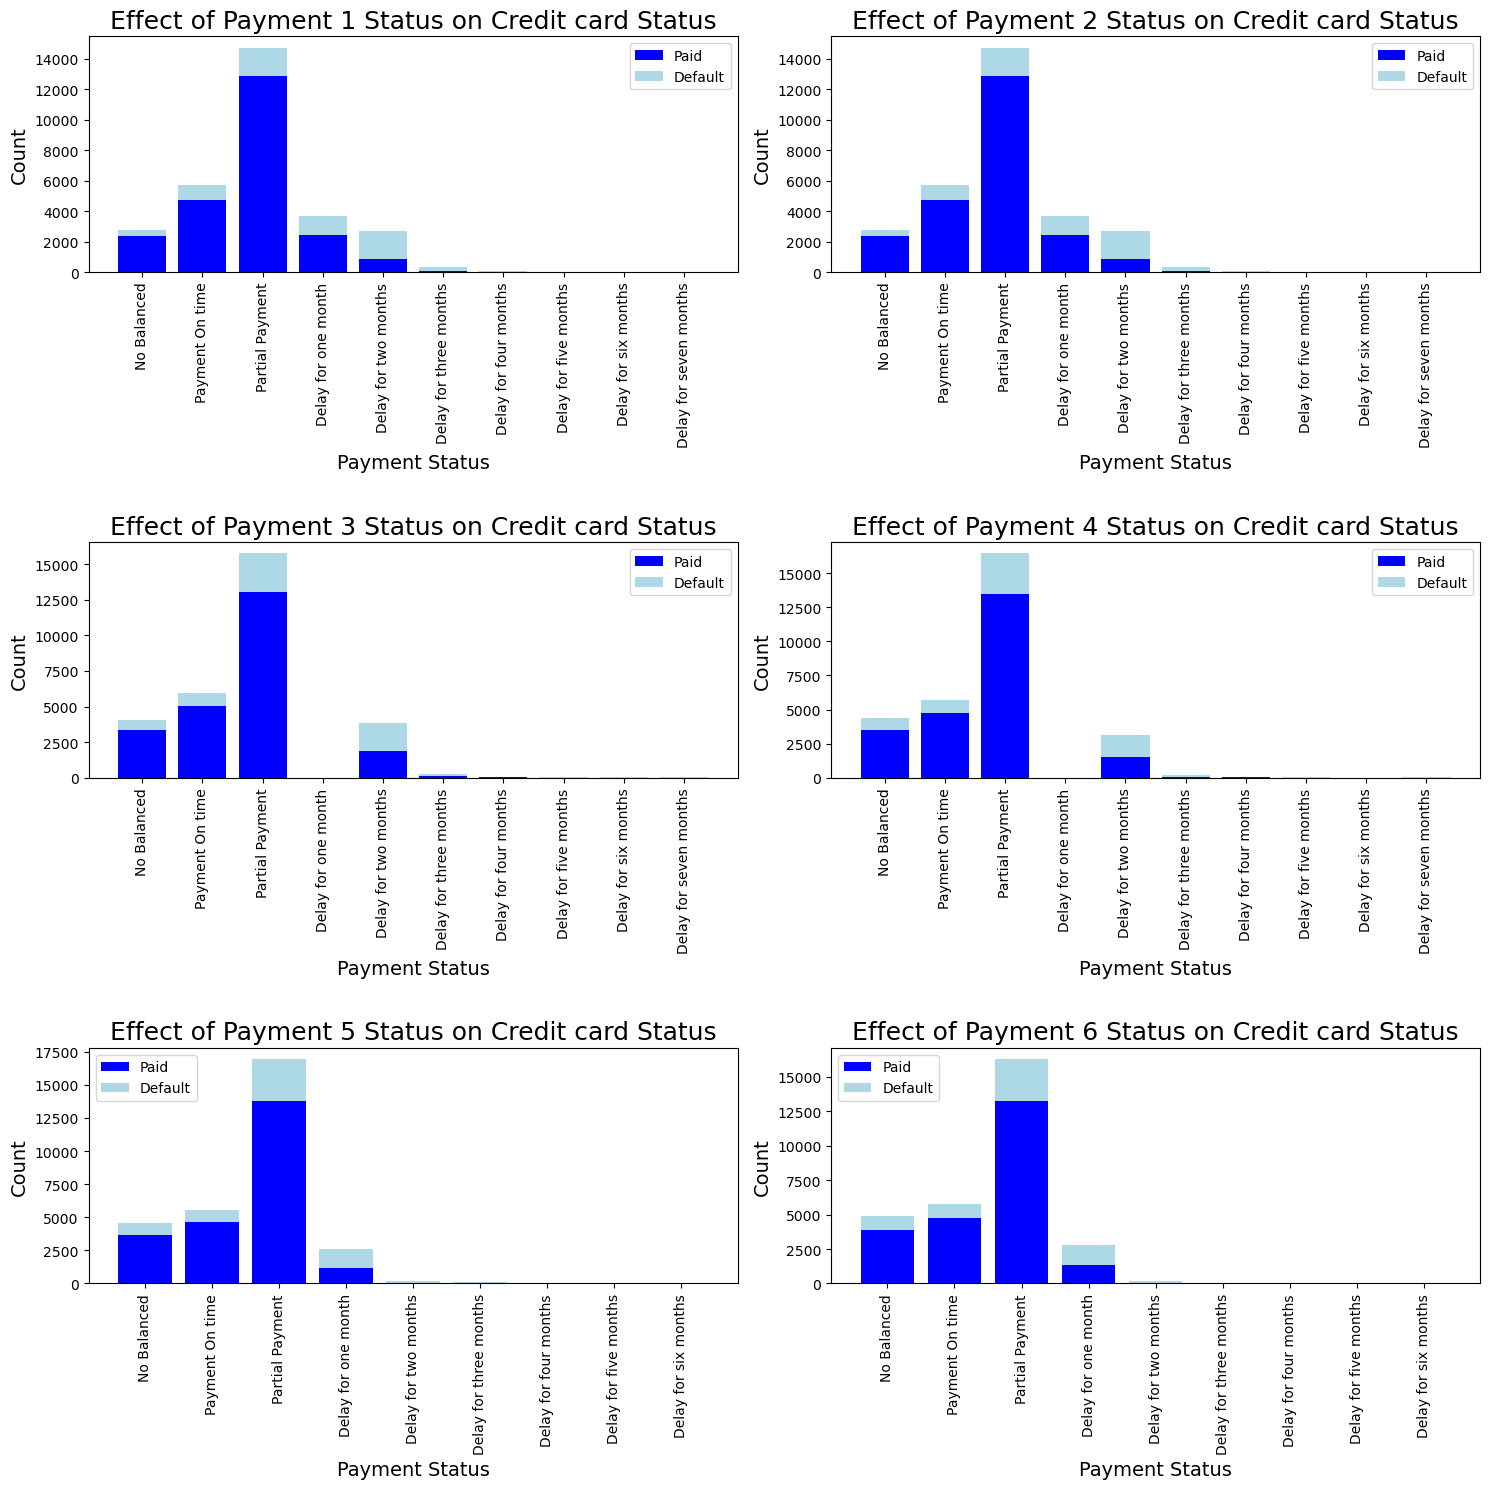

In [36]:
fig, [(ax1, ax2), (ax3,ax4),(ax5,ax6)] = plt.subplots(nrows = 3, ncols = 2, figsize=(15,15))


m6= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'PAY_1'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'PAY_1'].value_counts()}, index=None)

m7= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'PAY_2'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'PAY_2'].value_counts()}, index=None)

m8= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'PAY_3'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'PAY_3'].value_counts()}, index=None)

m9= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'PAY_4'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'PAY_4'].value_counts()}, index=None)

m10= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'PAY_5'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'PAY_5'].value_counts()}, index=None)

m11= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'PAY_6'].value_counts(), 
                  'Default': df.loc[df['default.payment.next.month']==1, 'PAY_6'].value_counts()}, index=None)


m6= m6.set_axis(['No Balanced', 'Payment On time', 'Partial Payment','Delay for one month','Delay for two months',
                 'Delay for three months', 'Delay for four months','Delay for five months', 'Delay for six months',
                 'Delay for seven months','Delay for seven months'], axis = "index")

m7= m7.set_axis(['No Balanced', 'Payment On time', 'Partial Payment','Delay for one month','Delay for two months',
                 'Delay for three months', 'Delay for four months','Delay for five months', 'Delay for six months',
                 'Delay for seven months','Delay for seven months'], axis = "index")

m8= m8.set_axis(['No Balanced', 'Payment On time', 'Partial Payment','Delay for one month','Delay for two months',
                 'Delay for three months', 'Delay for four months','Delay for five months', 'Delay for six months',
                 'Delay for seven months','Delay for seven months'], axis = "index")

m9= m9.set_axis(['No Balanced', 'Payment On time', 'Partial Payment','Delay for one month','Delay for two months',
                 'Delay for three months', 'Delay for four months','Delay for five months', 'Delay for six months',
                 'Delay for seven months','Delay for seven months'], axis = "index")

m10= m10.set_axis(['No Balanced', 'Payment On time', 'Partial Payment','Delay for one month','Delay for two months',
                 'Delay for three months', 'Delay for four months','Delay for five months', 'Delay for six months',
                 'Delay for seven months'], axis = "index")

m11= m11.set_axis(['No Balanced', 'Payment On time', 'Partial Payment','Delay for one month','Delay for two months',
                 'Delay for three months', 'Delay for four months','Delay for five months', 'Delay for six months',
                 'Delay for seven months'], axis = "index")


ax1.bar(m6.index,m6["Paid"], color = "blue")
ax1.bar(m6.index, m6["Default"], bottom = m6["Paid"], color = "lightblue" )
ax1.set_xlabel("Payment Status", fontsize = 14)
ax1.set_ylabel("Count", fontsize = 14)
ax1.set_title("Effect of Payment 1 Status on Credit card Status", fontsize = 18)
ax1.set_xticklabels(m6.index, rotation=90)
ax1.legend(["Paid","Default"]);

ax2.bar(m7.index,m6["Paid"], color = "blue")
ax2.bar(m7.index, m6["Default"], bottom = m6["Paid"], color = "lightblue" )
ax2.set_xlabel("Payment Status", fontsize = 14)
ax2.set_ylabel("Count", fontsize = 14)
ax2.set_title("Effect of Payment 2 Status on Credit card Status", fontsize = 18)
ax2.set_xticklabels(m7.index, rotation=90)
ax2.legend(["Paid","Default"]);

ax3.bar(m8.index,m8["Paid"], color = "blue")
ax3.bar(m8.index, m8["Default"], bottom = m8["Paid"], color = "lightblue" )
ax3.set_xlabel("Payment Status", fontsize = 14)
ax3.set_ylabel("Count", fontsize = 14)
ax3.set_title("Effect of Payment 3 Status on Credit card Status", fontsize = 18)
ax3.set_xticklabels(m8.index, rotation=90)
ax3.legend(["Paid","Default"]);

ax4.bar(m9.index,m9["Paid"], color = "blue")
ax4.bar(m9.index, m9["Default"], bottom = m9["Paid"], color = "lightblue" )
ax4.set_xlabel("Payment Status", fontsize = 14)
ax4.set_ylabel("Count", fontsize = 14)
ax4.set_title("Effect of Payment 4 Status on Credit card Status", fontsize = 18)
ax4.set_xticklabels(m9.index, rotation=90)
ax4.legend(["Paid","Default"]);

ax5.bar(m10.index,m10["Paid"], color = "blue")
ax5.bar(m10.index, m10["Default"], bottom = m10["Paid"], color = "lightblue" )
ax5.set_xlabel("Payment Status", fontsize = 14)
ax5.set_ylabel("Count", fontsize = 14)
ax5.set_title("\nEffect of Payment 5 Status on Credit card Status", fontsize = 18)
ax5.set_xticklabels(m10.index, rotation=90)
ax5.legend(["Paid","Default"]);

ax6.bar(m11.index,m11["Paid"], color = "blue")
ax6.bar(m11.index, m11["Default"], bottom = m11["Paid"], color = "lightblue" )
ax6.set_xlabel("Payment Status", fontsize = 14)
ax6.set_ylabel("Count", fontsize = 14)
ax6.set_title("\nEffect of Payment 6 Status on Credit card Status", fontsize = 18)
ax6.set_xticklabels(m11.index, rotation=90)
ax6.legend(["Paid","Default"]);


## Effect of Bill Amount on Credit card Loan Status

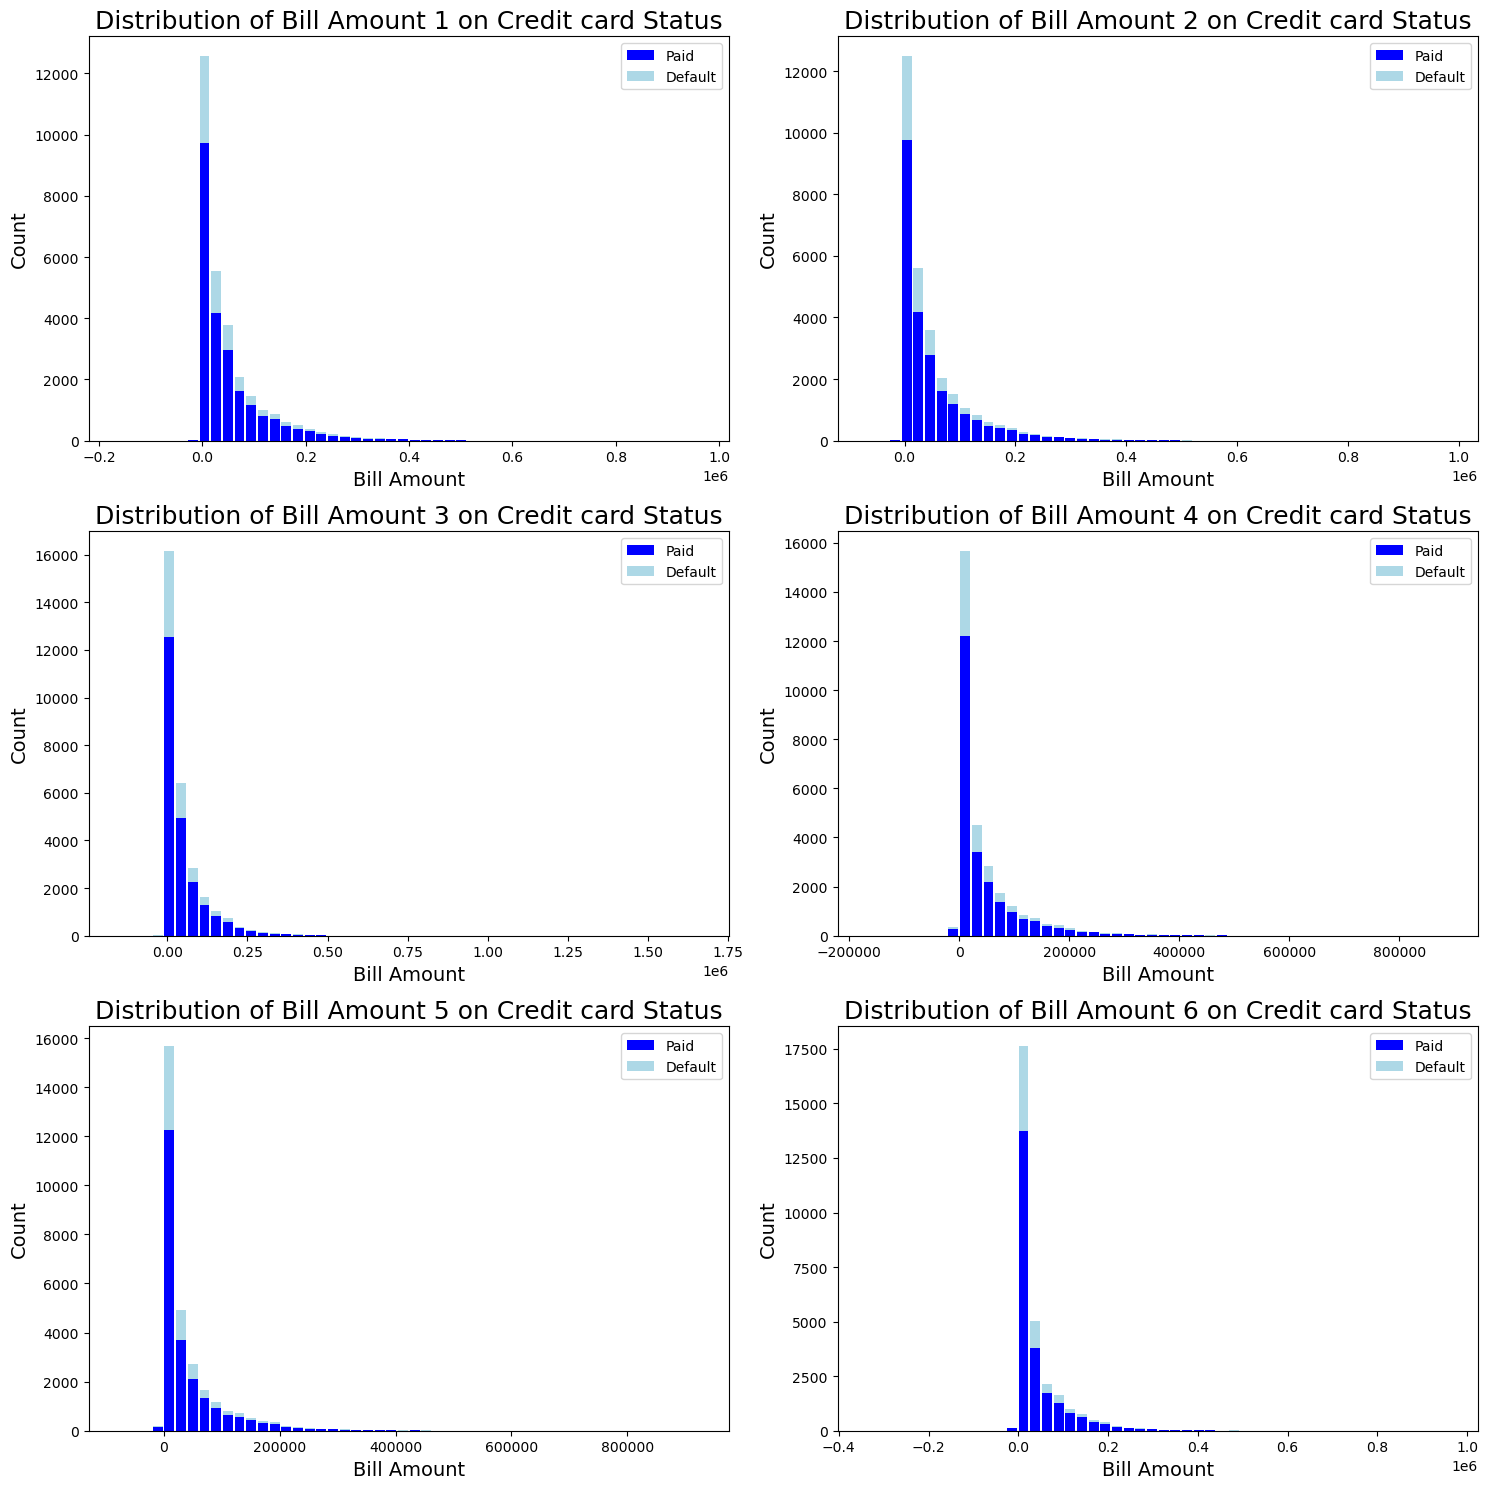

In [37]:
fig, [(ax1, ax2), (ax3,ax4),(ax5,ax6)] = plt.subplots(nrows = 3, ncols = 2, figsize=(15,15))


m12= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'BILL_AMT1'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'BILL_AMT1']}, index=None)

m13= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'BILL_AMT2'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'BILL_AMT2']}, index=None)

m14= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'BILL_AMT3'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'BILL_AMT3']}, index=None)

m15= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'BILL_AMT4'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'BILL_AMT4']}, index=None)

m16= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'BILL_AMT5'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'BILL_AMT5']}, index=None)

m17= pd.DataFrame({'Paid': df.loc[df['default.payment.next.month']==0, 'BILL_AMT6'], 
                  'Default': df.loc[df['default.payment.next.month']==1, 'BILL_AMT6']}, index=None)


ax1.hist(m12,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax1.set_xlabel("Bill Amount", fontsize = 14)
ax1.set_ylabel("Count", fontsize = 14)
ax1.set_title("Distribution of Bill Amount 1 on Credit card Status", fontsize = 18)
ax1.legend(["Paid","Default"]);

ax2.hist(m13,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax2.set_xlabel("Bill Amount", fontsize = 14)
ax2.set_ylabel("Count", fontsize = 14)
ax2.set_title("Distribution of Bill Amount 2 on Credit card Status", fontsize = 18)
ax2.legend(["Paid","Default"]);

ax3.hist(m14,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax3.set_xlabel("Bill Amount", fontsize = 14)
ax3.set_ylabel("Count", fontsize = 14)
ax3.set_title("Distribution of Bill Amount 3 on Credit card Status", fontsize = 18)
ax3.legend(["Paid","Default"]);

ax4.hist(m15,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax4.set_xlabel("Bill Amount", fontsize = 14)
ax4.set_ylabel("Count", fontsize = 14)
ax4.set_title("Distribution of Bill Amount 4 on Credit card Status", fontsize = 18)
ax4.legend(["Paid","Default"]);

ax5.hist(m16,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax5.set_xlabel("Bill Amount", fontsize = 14)
ax5.set_ylabel("Count", fontsize = 14)
ax5.set_title("Distribution of Bill Amount 5 on Credit card Status", fontsize = 18)
ax5.legend(["Paid","Default"]);

ax6.hist(m17,stacked=True, bins=50, rwidth=0.85,color=["blue", "lightblue"])
ax6.set_xlabel("Bill Amount", fontsize = 14)
ax6.set_ylabel("Count", fontsize = 14)
ax6.set_title("Distribution of Bill Amount 6 on Credit card Status", fontsize = 18)
ax6.legend(["Paid","Default"]);

## Distribution of Payment Amount

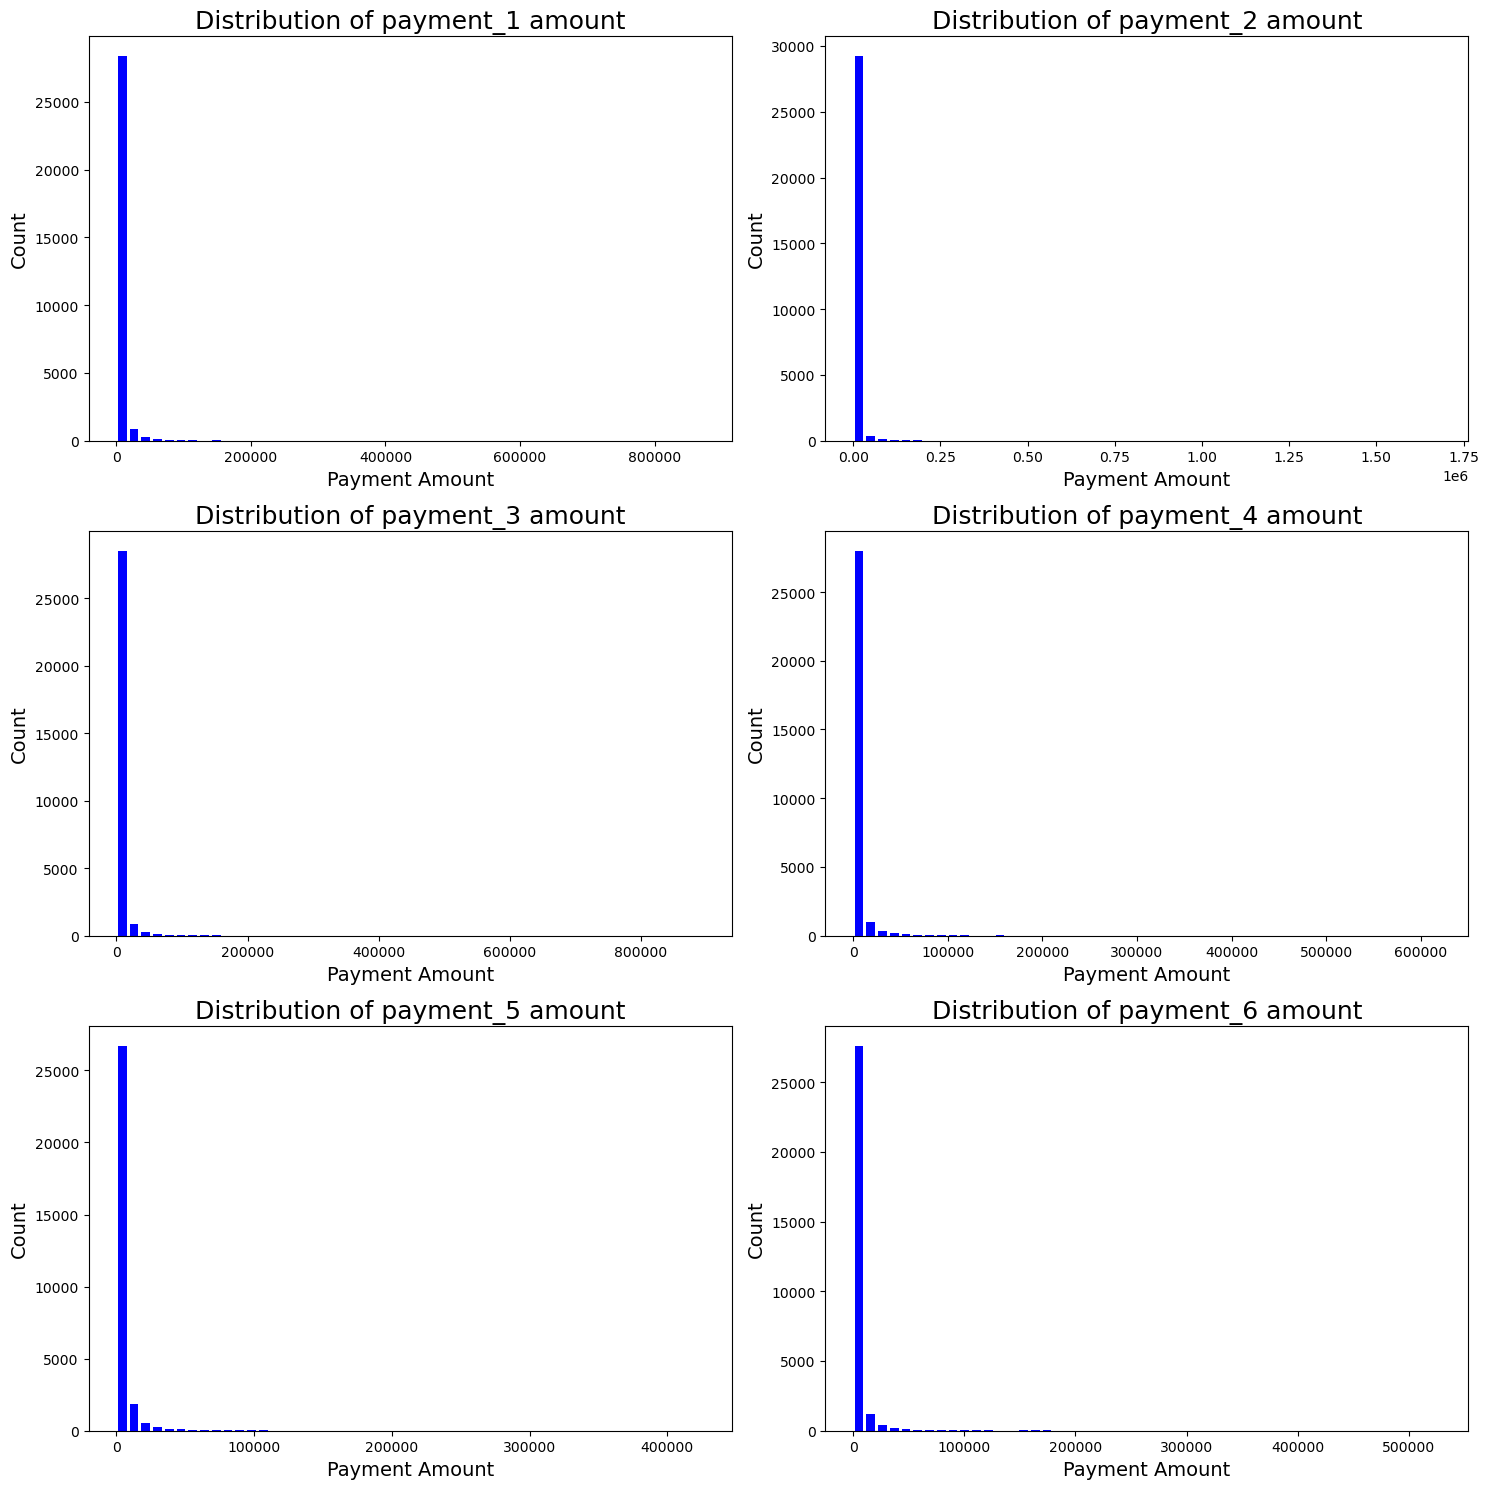

In [38]:
fig, [(ax1, ax2), (ax3,ax4),(ax5,ax6)] = plt.subplots(nrows = 3, ncols = 2, figsize=(15,15))

ax1.hist(df['PAY_AMT1'], bins=50, rwidth=0.75, color="Blue")
ax1.set_xlabel("Payment Amount", fontsize = 14)
ax1.set_ylabel("Count", fontsize = 14)
ax1.set_title("Distribution of payment_1 amount", fontsize = 18)

ax2.hist(df['PAY_AMT2'], bins=50, rwidth=0.75, color="Blue")
ax2.set_xlabel("Payment Amount", fontsize = 14)
ax2.set_ylabel("Count", fontsize = 14)
ax2.set_title("Distribution of payment_2 amount", fontsize = 18)

ax3.hist(df['PAY_AMT3'], bins=50, rwidth=0.75, color="Blue")
ax3.set_xlabel("Payment Amount", fontsize = 14)
ax3.set_ylabel("Count", fontsize = 14)
ax3.set_title("Distribution of payment_3 amount", fontsize = 18)

ax4.hist(df['PAY_AMT4'], bins=50, rwidth=0.75, color="Blue")
ax4.set_xlabel("Payment Amount", fontsize = 14)
ax4.set_ylabel("Count", fontsize = 14)
ax4.set_title("Distribution of payment_4 amount", fontsize = 18)

ax5.hist(df['PAY_AMT5'], bins=50, rwidth=0.75, color="Blue")
ax5.set_xlabel("Payment Amount", fontsize = 14)
ax5.set_ylabel("Count", fontsize = 14)
ax5.set_title("Distribution of payment_5 amount", fontsize = 18)

ax6.hist(df['PAY_AMT6'], bins=50, rwidth=0.75, color="Blue")
ax6.set_xlabel("Payment Amount", fontsize = 14)
ax6.set_ylabel("Count", fontsize = 14)
ax6.set_title("Distribution of payment_6 amount", fontsize = 18);


# Spliting Dataset

In [39]:
col_categorical = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] 

col_numeric = ['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [40]:
sc = StandardScaler()
df[col_numeric]= sc.fit_transform(df[col_numeric])

In [41]:
X = df[col_categorical + col_numeric]
y = df["default.payment.next.month"]

we split data to train and validate with ratio 80/20. 

In [42]:
X_train_total, X_validate, y_train_total, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

Now the train total is also split to train and test data wirh ratio of 80/20. 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train_total, y_train_total, test_size=0.2, random_state=42)

# Modeling

## Logistic Regression

In [44]:
logisticmodel = LogisticRegression(random_state=0)
logisticmodel.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [45]:
y_pred_logistic = logisticmodel.predict(X_test)

In [46]:
confusion_matrix(y_test,y_pred_logistic)

array([[3651,  104],
       [ 793,  252]], dtype=int64)

In [49]:
logisticregresion_Accuracy = accuracy_score(y_test,y_pred_logistic)
logisticregresion_Accuracy

0.813125

In [774]:
Logisticregression_f1score = f1_score(y_test,y_pred_logistic)
Logisticregression_f1score

0.35974304068522484

## Naive Bayes model

In [775]:
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [776]:
y_pred_naive = naivemodel.predict(X_test)

In [777]:
confusion_matrix(y_test,y_pred_naive)

array([[2657, 1098],
       [ 335,  710]], dtype=int64)

In [778]:
Naive_Accuracy = accuracy_score(y_test,y_pred_naive)
Naive_Accuracy

0.7014583333333333

In [779]:
Naive_f1score = f1_score(y_test,y_pred_naive)
Naive_f1score

0.4977216964598668

## Decision Tree model

In [780]:
dicisiontree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dicisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [781]:
y_pred_decisiontree =dicisiontree_model.predict(X_test)


In [782]:
confusion_matrix(y_test,y_pred_decisiontree)

array([[3060,  695],
       [ 599,  446]], dtype=int64)

In [783]:
DecisioTree_Accuracy = accuracy_score(y_test,y_pred_decisiontree)
DecisioTree_Accuracy

0.7304166666666667

In [784]:
DecisioTree_f1score = f1_score(y_test,y_pred_decisiontree)
DecisioTree_f1score

0.4080512351326624

## Random Forest Model

In [785]:
RandomForest_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RandomForest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [786]:
y_pred_randomforest = RandomForest_model.predict(X_test)

In [787]:
confusion_matrix(y_test,y_pred_randomforest)

array([[3551,  204],
       [ 652,  393]], dtype=int64)

In [788]:
RandomForest_Accuracy = accuracy_score(y_test,y_pred_randomforest)
RandomForest_Accuracy

0.8216666666666667

In [789]:
RandomForest_f1score = f1_score(y_test,y_pred_randomforest)
RandomForest_f1score

0.4786845310596833

## K-Neighbour Model

In [790]:
Kneighbour_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Kneighbour_model.fit(X_train, y_train)

KNeighborsClassifier()

In [791]:
y_pred_kneighbour = Kneighbour_model.predict(X_test)

In [792]:
confusion_matrix(y_test,y_pred_kneighbour)

array([[3464,  291],
       [ 661,  384]], dtype=int64)

In [793]:
Kneighbour_Accuracy = accuracy_score(y_test,y_pred_kneighbour)
Kneighbour_Accuracy

0.8016666666666666

In [794]:
Kneighbour_f1score = f1_score(y_test,y_pred_kneighbour)
Kneighbour_f1score

0.4465116279069768

## XGBboost Model

In [795]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

[16:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [796]:
y_pred_xgb= xgb_model.predict(X_test)

In [797]:
confusion_matrix(y_test,y_pred_xgb)

array([[3549,  206],
       [ 658,  387]], dtype=int64)

In [798]:
XGB_Accuracy = accuracy_score(y_test,y_pred_xgb)
XGB_Accuracy

0.82

In [799]:
XGB_f1score = f1_score(y_test,y_pred_xgb)
XGB_f1score

0.47252747252747246

# Model Interpretation

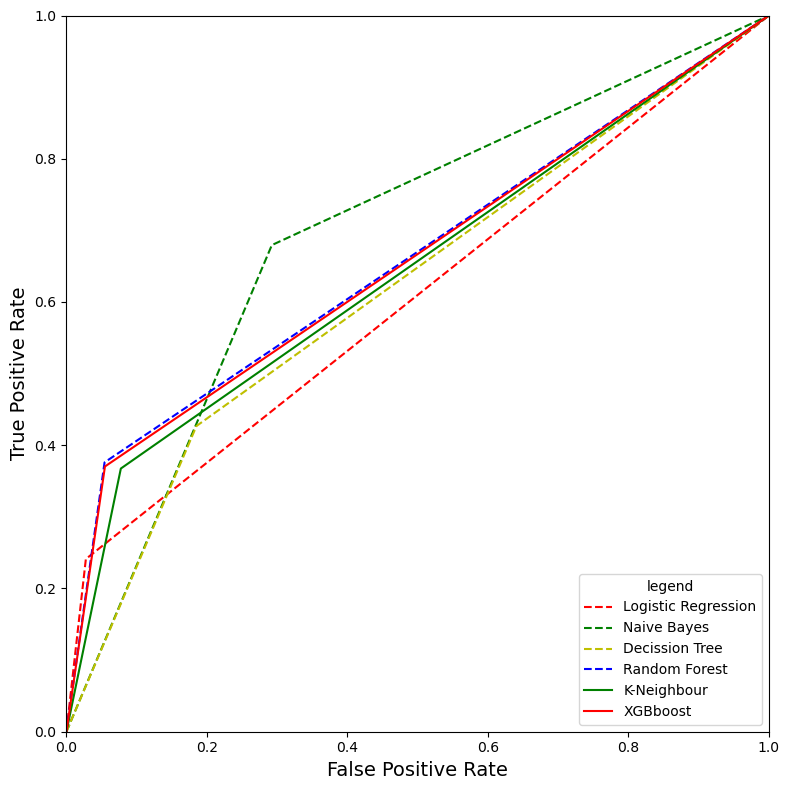

In [800]:
plt.figure(figsize =(8,8))
fpr_logistic, tpr_logistic, _ = metrics.roc_curve(y_test, y_pred_logistic)
fpr_naive, tpr_naive, _ = metrics.roc_curve(y_test, y_pred_naive)
fpr_decisiontree, tpr_decisiontree, _ = metrics.roc_curve(y_test, y_pred_decisiontree)
fpr_randomforest, tpr_randomforest, _ = metrics.roc_curve(y_test, y_pred_randomforest)
fpr_kneighbour, tpr_kneighbour, _ = metrics.roc_curve(y_test, y_pred_kneighbour)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_xgb)


#create ROC curve
plt.plot(fpr_logistic, tpr_logistic,'r--', label = "Logistic Regression")
plt.plot(fpr_naive, tpr_naive,'g--', label = "Naive Bayes")
plt.plot(fpr_decisiontree, tpr_decisiontree,'y--', label = "Decission Tree")
plt.plot(fpr_randomforest, tpr_randomforest,'b--', label = "Random Forest")
plt.plot(fpr_kneighbour, tpr_kneighbour,'g', label = "K-Neighbour")
plt.plot(fpr_xgb, tpr_xgb,'r', label = "XGBboost")


plt.ylabel('True Positive Rate', fontsize = 14)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(title="legend", loc = 'lower right')
plt.show()

In [801]:
EvaluationTable = PrettyTable(["Model","Accuracy","f1_score","Explainability"]) 
                               
EvaluationTable.add_row(["Logistic Regression", round(logisticregresion_Accuracy,2),round(Logisticregression_f1score,2), "High"])
EvaluationTable.add_row(["Naive Bayes", round(Naive_Accuracy,2),round(Naive_f1score,2),"High"])
EvaluationTable.add_row(["Decision Tree", round(DecisioTree_Accuracy,2),round(DecisioTree_f1score,2),"High"])
EvaluationTable.add_row(["Random Forest", round(RandomForest_Accuracy,2),round(RandomForest_f1score,2),"Medium"])
EvaluationTable.add_row(["K-Neighbour", round(Kneighbour_Accuracy,2),round(Kneighbour_f1score,2),"Medium"])
EvaluationTable.add_row(["XGBboost", round(XGB_Accuracy,2),round(XGB_f1score,2),"Medium"])


print(EvaluationTable)

+---------------------+----------+----------+----------------+
|        Model        | Accuracy | f1_score | Explainability |
+---------------------+----------+----------+----------------+
| Logistic Regression |   0.81   |   0.36   |      High      |
|     Naive Bayes     |   0.7    |   0.5    |      High      |
|    Decision Tree    |   0.73   |   0.41   |      High      |
|    Random Forest    |   0.82   |   0.48   |     Medium     |
|     K-Neighbour     |   0.8    |   0.45   |     Medium     |
|       XGBboost      |   0.82   |   0.47   |     Medium     |
+---------------------+----------+----------+----------------+


# Validation Model 

Besed on high accuracy, high f1-score and high explainability the Decision Tree and Logistic Regression are the good model. 

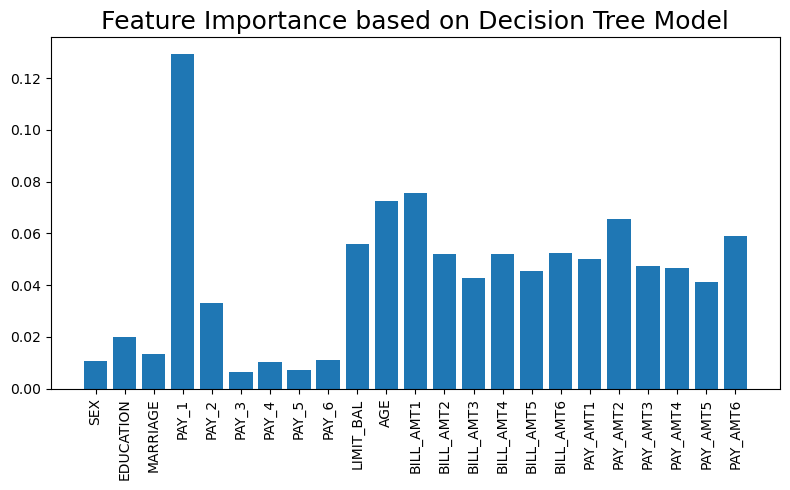

In [802]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(dicisiontree_model.feature_names_in_,dicisiontree_model.feature_importances_,)
ax.set_xticklabels(dicisiontree_model.feature_names_in_, rotation=90)
ax.set_title("Feature Importance based on Decision Tree Model", fontsize = 18);

In [803]:
y_pred_decisiontree_validation = dicisiontree_model.predict(X_validate)

In [804]:
confusion_matrix(y_validate,y_pred_decisiontree_validation)

array([[3826,  869],
       [ 780,  525]], dtype=int64)

In [805]:
DecisionTree_validate_Accuracy = accuracy_score(y_validate,y_pred_decisiontree_validation)
DecisionTree_validate_Accuracy 

0.7251666666666666

In [806]:
DecisionTree_validate_f1score = f1_score(y_validate,y_pred_decisiontree_validation)
DecisionTree_validate_f1score

0.3890329751759911

In [807]:
EvaluationTable = PrettyTable(["validation Model","Accuracy","f1_score"]) 
                               
EvaluationTable.add_row(["Decision Tree", round(DecisionTree_validate_Accuracy,2),round(DecisionTree_validate_f1score,2)])
print(EvaluationTable)

+------------------+----------+----------+
| validation Model | Accuracy | f1_score |
+------------------+----------+----------+
|  Decision Tree   |   0.73   |   0.39   |
+------------------+----------+----------+


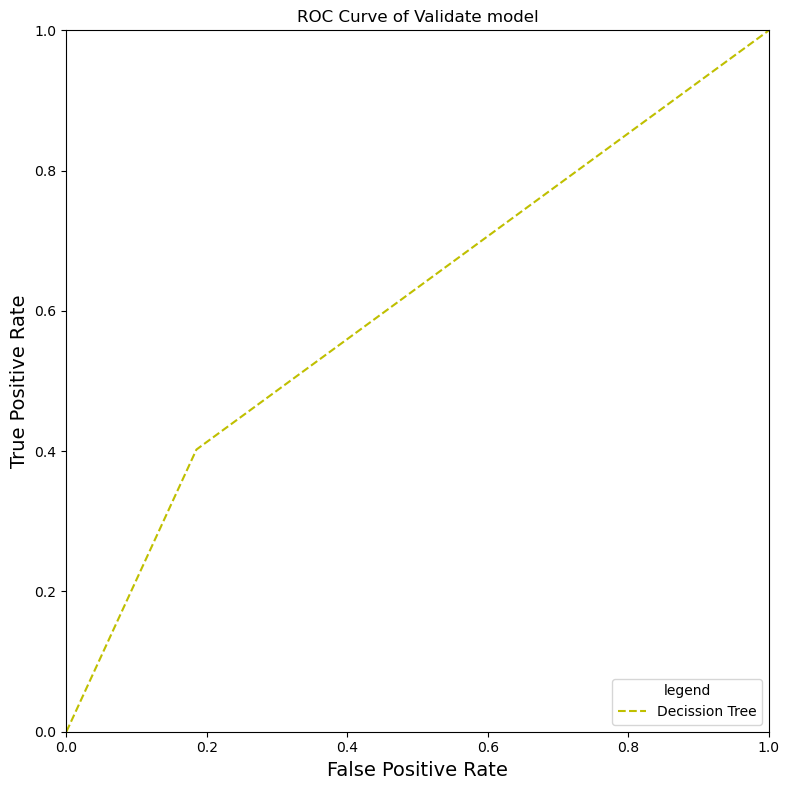

In [808]:
plt.figure(figsize =(8,8))

fpr_decisiontree, tpr_decisiontree, _ = metrics.roc_curve(y_validate, y_pred_decisiontree_validation)

#create ROC curve
plt.plot(fpr_decisiontree, tpr_decisiontree,'y--', label = "Decission Tree")

plt.ylabel('True Positive Rate', fontsize = 14)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(title="legend", loc = 'lower right')
plt.title("ROC Curve of Validate model")
plt.show()